We finally get to fit the model to our grade data and
see how well it does at predicting the final grade

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#bring in all your previous parts of data science workflow to use in final modeling
import env
import wrangle_grades
import split_scale
import features

In [75]:
df=wrangle_grades.wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(4)
memory usage: 4.0 KB


In [77]:
train,test=split_scale.split_my_data(df)

In [78]:
train.shape
test.shape

(21, 4)

In [79]:
scaler,train,test=split_scale.standard_scaler(train,test)

In [80]:
train
test

,exam1,exam2,exam3,final_grade
10,-1.413948,-1.158590,-1.595004,-1.210771
73,-0.520348,-1.158590,-0.635336,-0.348806
91,1.713654,1.383279,1.403959,1.470897
30,1.192387,1.383279,1.523918,1.566671
65,1.713654,1.383279,1.403959,1.470897
0,1.713654,1.383279,1.403959,1.470897
5,0.149853,-0.650216,0.204374,0.034289
52,1.713654,1.383279,1.403959,1.470897
84,1.117920,1.281604,1.284001,1.183576
4,1.192387,1.383279,1.523918,1.566671


In [81]:
X_train=train.drop(columns=['final_grade'])
X_test=test.drop(columns=['final_grade'])
y_train=train[['final_grade']]
y_test=test[['final_grade']]

In [87]:
number_of_features=features.optimal_number_of_features(X_train,y_train,X_test,y_test)
selected_features=features.optimal_features(X_train,y_train,number_of_features)
#number_of_features
selected_features
#X_train=X_train[selected_features]
#X_test=X_test[selected_features]

Index(['exam1'], dtype='object')

Now that all the preprocessing and feature engineering is done we can fit the Linear Regression

In [83]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's look at the values the lm model generates

In [84]:
lm1_y_intercept=lm1.intercept_
print("intercept: ",lm1_y_intercept)
lm1_coefficents=lm1.coef_
print("coefficents: ",lm1_coefficents)

intercept:  [1.50378128e-16]
coefficents:  [[0.78888818 0.20816561]]


In [85]:
#regression equation where m1 and m2 are coefficents from above and b is intercept
print('{}=b+m1*{}+m2*{}'.format(y_train.columns[0],X_train.columns[0],X_train.columns[1]))

final_grade=b+m1*exam1+m2*exam3


In [86]:
#Note that the curriculum does not use the right X split
y_pred_lm1=lm1.predict(X_test)
y_pred_lm1
y_pred_raveled=y_pred_lm1.ravel().reshape(21)
y_test=np.array(y_test).ravel().reshape(21)
pd.DataFrame({'predicted_values':y_pred_raveled,'real_values':y_test})

,predicted_values,real_values
0,-1.447472,-1.210771
1,-0.542751,-0.348806
2,1.644137,1.470897
3,1.257887,1.566671
4,1.644137,1.470897
5,1.644137,1.470897
6,0.160761,0.034289
7,1.644137,1.470897
8,1.149199,1.183576
9,1.257887,1.566671


In [14]:
mse_lm1=mean_squared_error(y_test,y_pred_lm1)
print("linear model \n mean_squared error: {:.3}".format(mse_lm1))

r2_lm1=r2_score(y_test,y_pred_lm1)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on exam1 and exam 3'.format(r2_lm1))


linear model 
 mean_squared error: 0.0379
96.80% of the variance in the students final grade can be explained by the grades on exam1 and exam 3


In [15]:
#Establishing the baseline model for comparison
y_pred_baseline=np.array([y_test.mean()[0]]*len(y_test))
MSE = mean_squared_error(y_test, y_pred_baseline)
SSE = MSE*len(y_test)
RMSE = sqrt(MSE)
evs=explained_variance_score(y_test,y_pred_baseline)


In [16]:
print(evs)
print(SSE)

0.0
24.85084322622909


In [17]:
test_unscaled=pd.DataFrame(scaler.inverse_transform(test),columns=test.columns.values).set_index([test.index.values])
y_unscaled=test_unscaled['final_grade']

test_pred1 = test
test_pred1['final_grade']=y_pred_lm1
test_pred1=pd.DataFrame(scaler.inverse_transform(test_pred1),columns=test.columns.values).set_index([test.index.values])
y_lm1_unscaled = test_pred1['final_grade']


test_pred_baseline = test.drop(columns='final_grade')
test_pred_baseline['final_grade'] = y_pred_baseline
test_pred_baseline = pd.DataFrame(scaler.inverse_transform(test_pred_baseline), columns=test.columns.values).set_index([test.index.values])
y_baseline_unscaled = test_pred_baseline['final_grade']

In [24]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()})

,actual,lm1,lm_baseline
10,68.0,65.528539,86.52381
73,77.0,74.974967,86.52381
91,96.0,97.808844,86.52381
30,97.0,93.775905,86.52381
65,96.0,97.808844,86.52381
0,96.0,97.808844,86.52381
5,81.0,82.320520,86.52381
52,96.0,97.808844,86.52381
84,93.0,92.641061,86.52381
4,97.0,93.775905,86.52381


In [26]:
test_ravel=y_lm1_unscaled.ravel()

In [29]:
np.unravel_index(test_ravel,int(y_lm1_unscaled.shape))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

In [21]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()}).melt(id_vars=['actual'],var_name='model',value_name='prediction')

,actual,model,prediction
0,68.0,lm1,65.528539
1,77.0,lm1,74.974967
2,96.0,lm1,97.808844
3,97.0,lm1,93.775905
4,96.0,lm1,97.808844
5,96.0,lm1,97.808844
6,81.0,lm1,82.320520
7,96.0,lm1,97.808844
8,93.0,lm1,92.641061
9,97.0,lm1,93.775905


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

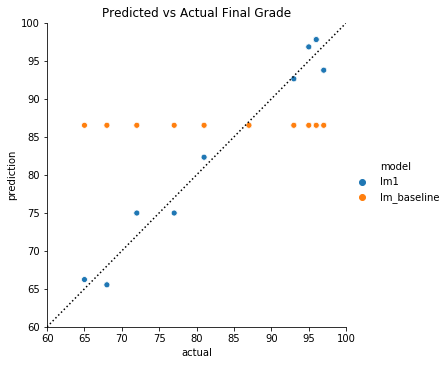

In [22]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'],var_name='model',value_name='prediction')\
.pipe((sns.relplot,'data'),x='actual',y='prediction',hue='model')
min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')